In [0]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import keras.layers as layers
import numpy as np
from keras.models import load_model
import cv2

Referred to the following:: 
https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

https://www.pyimagesearch.com/2018/09/24/opencv-face-recognition/

In [33]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [42]:
%cd ./drive/My Drive/AML_Project/Images


/content/drive/My Drive/AML_Project/Images


In [43]:
%ls

Training/  Validation/  vgg16_1.h5


In [0]:
%cd ./content/drive/My Drive/AML_Project/Images/Training/

[Errno 2] No such file or directory: './content/drive/My Drive/AML_Project/Images/Training/'
/content


In [0]:
trdata = ImageDataGenerator(rescale=1./255)
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/AML_Project/Images/Training/",class_mode='categorical',target_size=(224,224))

tsdata = ImageDataGenerator(rescale=1./255)
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/AML_Project/Images/Validation/",class_mode='categorical', target_size=(224,224))

Found 30951 images belonging to 3 classes.
Found 4655 images belonging to 3 classes.


In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
#model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1024,activation="relu"))

In [0]:
model.add(Dense(units=3, activation="softmax"))

In [0]:
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=1, mode='auto')

In [0]:
hist = model.fit_generator(steps_per_epoch=50,generator=traindata, validation_data= testdata, validation_steps=10,epochs=50,callbacks=[checkpoint,early])

Epoch 1/50





50/50 [==============================] - 855s 17s/step - loss: 0.4915 - acc: 0.8400 - val_loss: 0.4947 - val_acc: 0.8781

Epoch 00001: val_acc improved from -inf to 0.87813, saving model to vgg16_1.h5
Epoch 2/50
50/50 [==============================] - 860s 17s/step - loss: 0.1593 - acc: 0.9550 - val_loss: 0.1939 - val_acc: 0.9375

Epoch 00002: val_acc improved from 0.87813 to 0.93750, saving model to vgg16_1.h5
Epoch 3/50
50/50 [==============================] - 813s 16s/step - loss: 0.1377 - acc: 0.9531 - val_loss: 0.1685 - val_acc: 0.9437

Epoch 00003: val_acc improved from 0.93750 to 0.94375, saving model to vgg16_1.h5
Epoch 4/50
50/50 [==============================] - 814s 16s/step - loss: 0.0851 - acc: 0.9706 - val_loss: 0.1579 - val_acc: 0.9594

Epoch 00004: val_acc improved from 0.94375 to 0.95937, saving model to vgg16_1.h5
Epoch 5/50
50/50 [==============================] - 807s 16s/step - loss: 0.0902 - acc: 0.9688 - val_loss: 0.0899 - val_acc: 0.9656

Epoch

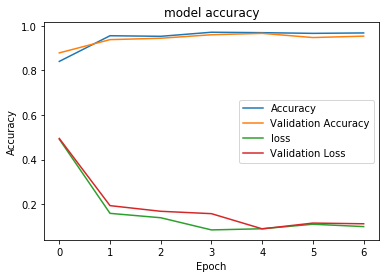

In [0]:
 import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [0]:
saved_model = load_model("vgg16_1.h5")

In [47]:
cd ..

/content/drive/My Drive/AML_Project


In [48]:
cd ./Test/


/content/drive/My Drive/AML_Project/Test


In [0]:
from keras.preprocessing import image
from imutils import paths

#testPaths = list(paths.list_images('/content/drive/My Drive/AML_Project/Test/'))
True_Memes=0
False_Memes=0

for memes in range(1,501):
    j=str(memes)
    image0 = cv2.imread('/content/drive/My Drive/AML_Project/Test/'+j+".jpg")
    img = image.load_img(j+".jpg",target_size=(224,224))
    img = np.asarray(img)
    #img=img/255
    img = np.expand_dims(img, axis=0) 
    output = saved_model.predict(img)
    #print (output)
    out=np.argmax(output)
    
    
    if out==1:
        True_Memes+=1
        #cv2.imwrite('others/'+name+'.jpg', image)
        cv2.imwrite('Memes_Classified/'+j+'.jpg', image0)
        
    else:
        False_Memes+=1
Meme_accuracy= True_Memes/500
print("Out of 500 Memes in the Dataset",True_Memes,"are correctly classified!")
print("Model was",Meme_accuracy*100,"% accurate in identifying memes.")

True_Humans=0
False_Humans=0
for humans in range(501,1001):
    k=str(humans)
    # image = cv2.imread(path)
    image1= cv2.imread('/content/drive/My Drive/AML_Project/Test/'+k+".jpg")
    img1 = image.load_img(k+".jpg",target_size=(224,224))
    img1 = np.asarray(img1)
    img1=img1/255
    img1 = np.expand_dims(img1, axis=0)    
    output1 = saved_model.predict(img1)
    #print (output1)
    out1=np.argmax(output1)
    #print(out1)
    if out1==0:
        True_Humans+=1
        
        cv2.imwrite('Humans_Classified/'+k+'.jpg', image1)
        
    
    else:
        False_Humans+=1
Human_accuracy= True_Humans/500
print("Out of 500 Human images in the Dataset",True_Humans,"are correctly classified!")
print("Model was",Human_accuracy*100,"% accurate in identifying Humans.")


True_Text=0
False_Text=0
for text in range(1001,1501):
    l=str(text)
    # image = cv2.imread(path)
    image2 = cv2.imread('/content/drive/My Drive/AML_Project/Test/'+l+".jpg")
    img2 = image.load_img(l+".jpg",target_size=(224,224))
    img2 = np.asarray(img2)
    #img2=img2/255
    img2 = np.expand_dims(img2, axis=0)
    output2 = saved_model.predict(img2)
    #print (output1)
    out2=np.argmax(output2)
    #print(out)
    if out2==2:
        True_Text+=1
        cv2.imwrite('Text_Classified/'+l+'.jpg',image2)
        
    else:
        False_Text+=1
Text_accuracy= True_Text/500
print("Out of 500 Text images in the Dataset",True_Text,"are correctly classified!")
print("Model was",Text_accuracy*100,"% accurate in identifying Text.")

Accuracy= (True_Text+True_Humans+True_Memes)/1500
print('')
print("Model was",Accuracy*100,"% accurate.")

In [30]:
cd ..


/content/drive/My Drive/AML_Project


In [31]:
cd ./Test1/

/content/drive/My Drive/AML_Project/Test1


In [0]:
from keras.preprocessing import image
from imutils import paths
from google.colab.patches import cv2_imshow



True_Humans1=0
False_Humans1=0
for humans in range(1,16):
    k=str(humans)
    # image = cv2.imread(path)
    image4= cv2.imread('/content/drive/My Drive/AML_Project/Test_with_our_images/'+k+".jpg")
    img3 = image.load_img(k+".jpg",target_size=(224,224))
    img3 = np.asarray(img3)
    img3=img3/255
    img3 = np.expand_dims(img3, axis=0)    
    output1 = saved_model.predict(img3)
    #print (output1)
    out1=np.argmax(output1)
  
    if out1==0:
        True_Humans1+=1
        
        cv2.imwrite('Our_images_classified/'+k+'.jpg', image4)
        
    
    else:
        False_Humans1+=1
Human_accuracy= True_Humans1/15
#cv2_imshow(image1)
print('')
print("Model was",Human_accuracy*100,"% accurate.")